In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns',30)

In [2]:
df = pd.read_csv(r"D:\aegis\Advance Python\Heath Care\kidney.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [4]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
id                  0
dtype: int64

In [5]:
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [6]:
classification={"ckd":1,"ckd\t":1,"notckd":0}
df.classification = df.classification.map(classification)

In [7]:
df.classification.value_counts()

1    250
0    150
Name: classification, dtype: int64

In [8]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.625000
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.484729
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,1.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000


In [9]:
df.dm.value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [10]:
df1 =  df.drop(['id','rbc','rc','wc','pot','sod','pcv'],axis=1)
df1

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,18.0,0.8,11.3,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,0.5,15.7,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,1.2,16.5,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,0.6,15.8,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,1.0,14.2,no,no,no,good,no,no,0


In [11]:
df1.isnull().sum().sort_values(ascending=False)

pc                65
hemo              52
su                49
sg                47
al                46
bgr               44
bu                19
sc                17
bp                12
age                9
ba                 4
pcc                4
htn                2
dm                 2
cad                2
ane                1
appet              1
pe                 1
classification     0
dtype: int64

In [12]:
df1.dropna(inplace=True)

In [13]:
df1

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,1.2,15.4,yes,yes,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,1.8,9.6,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,3.8,11.2,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,1.4,11.6,no,no,no,good,no,no,1
6,68.0,70.0,1.010,0.0,0.0,normal,notpresent,notpresent,100.0,54.0,24.0,12.4,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,0.5,15.7,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,1.2,16.5,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,0.6,15.8,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,1.0,14.2,no,no,no,good,no,no,0


In [14]:
row_rep = {'yes':1,'no':0,'normal':1,'abnormal':0,'present':1,'notpresent':0,'good':1,'poor':0,'\tno':0,'\tyes':1,' yes':1}
df1 = df1.replace(row_rep)

In [15]:
df1

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,15.4,1,1,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,9.6,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,11.2,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,11.6,0,0,0,1,0,0,1
6,68.0,70.0,1.010,0.0,0.0,1,0,0,100.0,54.0,24.0,12.4,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,0,0,140.0,49.0,0.5,15.7,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,0,0,75.0,31.0,1.2,16.5,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,0,0,100.0,26.0,0.6,15.8,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,0,0,114.0,50.0,1.0,14.2,0,0,0,1,0,0,0


In [16]:
## Model1: Random forest

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df1.drop('classification',axis=1)
y=df1.classification

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=20,stratify = y)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
y_pred1 = model_1.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [23]:
accuracy_score(y_test,y_pred1)

1.0

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [26]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [27]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [28]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 22,
 'bootstrap': False}

In [29]:
# Manually provide the best parameters to model for training
rf_reg = RandomForestClassifier(**{'n_estimators': 200,
 'min_samples_split':10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 22,
 'bootstrap': False})

In [30]:
rf_reg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=22, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200)

In [31]:
y_pred2 = rf_reg.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

1.0

In [33]:
print("Score based on testing data:")
print("Adjusted R-squared : {}%".format((rf_reg.score(X_test,y_test)*100).round(2)))
print("RMSE :", np.sqrt(mean_squared_error(y_pred2,y_test)).round(2))

Score based on testing data:
Adjusted R-squared : 100.0%
RMSE : 0.0


In [34]:
rf_reg.feature_importances_

array([0.00385193, 0.00381295, 0.11889902, 0.14117404, 0.004719  ,
       0.01019308, 0.00094504, 0.        , 0.03599649, 0.03485672,
       0.24126359, 0.27472067, 0.06272074, 0.04691557, 0.        ,
       0.01901411, 0.0006055 , 0.00031156])

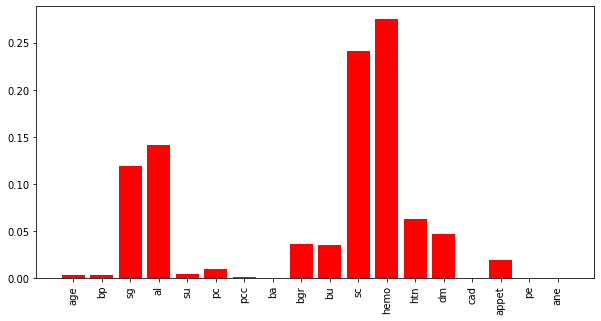

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
bar_rects = ax.bar(np.arange(18), rf_reg.feature_importances_, color='r', align='center')
ax.xaxis.set_ticks(np.arange(18))
ax.set_xticklabels(X.columns, rotation='vertical')
plt.show()


In [36]:
import pickle
filename = 'kideney_model.pkl'
pickle.dump(rf_reg, open(filename, 'wb'))